# Chest X-Ray (Pneumonia,Covid-19,Tuberculosis)

## Introduction

Chest X-rays are one of the most commonly used imaging techniques in the diagnosis of lung-related diseases. With the rise of deep learning, automatic classification of chest X-rays has become an essential tool to assist radiologists and medical professionals in identifying abnormalities more quickly and accurately.

In this project, we develop a deep learning model capable of classifying chest X-ray images into four categories: *Normal*, *COVID-19*, *Pneumonia*, and *Tuberculosis*. The model is trained using a publicly available dataset and evaluated on unseen data to ensure generalization.

The aim is not to replace doctors, but to provide a tool that supports early detection and helps prioritize medical cases, especially in situations where radiological expertise is limited or overwhelmed.


## Dataset Description

The dataset used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis) and contains chest X-ray (CXR) images categorized into four classes: *Normal*, *COVID-19*, *Pneumonia*, and *Tuberculosis*. It is organized into structured folders for training, validation, and testing, making it convenient for deep learning workflows.

### Folder Structure

The dataset is divided into three main subsets:

- *[train](https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis?select=chest_xray/train)*:  
  Contains the majority of the data used to train the model. Each class has its own folder:  
  train/NORMAL, train/COVID19, train/PNEUMONIA, train/TUBERCULOSIS.

- *[test](https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis?select=chest_xray/test)*:  
  A separate set of images used to evaluate the final performance of the trained model.

- *[val](https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis?select=chest_xray/val)*:  
  A small validation set used during training to monitor the model's performance and prevent overfitting.

### Class Distribution

Each subset includes the following four classes:

- COVID19: X-rays showing symptoms consistent with COVID-19 infection.
- NORMAL: Healthy lungs with no visible abnormalities.
- PNEUMONIA: Infected lungs due to bacterial or viral pneumonia.
- TUBERCULOSIS: X-rays with signs of pulmonary tuberculosis.

This dataset provides a valuable and realistic distribution of cases for training and testing deep learning models in medical image classification.

Chest X-Ray (Pneumonia,Covid-19,Tuberculosis)
Sent
Write to


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#  download dataset from kaggle

!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis


Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis
License(s): other


In [8]:
!unzip /content/chest-xray-pneumoniacovid19tuberculosis.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0854-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0856-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0857-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0858-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0859-0001.jpeg  
  inflating: train/NO

In [9]:
# import neccessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import math
import warnings
warnings.filterwarnings('ignore')




In [10]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except (FileNotFoundError, OSError):
        return None, None  # Handle cases where the file is not found or corrupted

In [11]:
#  function for making adata frame

import pandas as pd
# Function to create a DataFrame from image data
def create_image_dataframe(data_dir):
    image_paths = []
    labels = []
    widths = []
    heights = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image_paths.append(image_path)
                labels.append(class_name)
                width, height = get_image_dimensions(image_path)
                widths.append(width)
                heights.append(height)

    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels,
        'width': widths,
        'height': heights
    })
    return df


In [13]:
train_df = create_image_dataframe('/content/test')
test_df = create_image_dataframe('/content/test')

# Functions for EDA

In [ ]:
#  functions for class distribution make it colorful

import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df, title="Class Distribution"):
    print(df['label'].value_counts())
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    sns.countplot(x='label', data=df, palette="viridis") # Use a colorful palette
    plt.title(title, fontsize=16) # Increased title font size
    plt.xlabel("Class", fontsize=12) # Increased x-axis label font size
    plt.ylabel("Count", fontsize=12) # Increased y-axis label font size
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotated x-axis labels
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

def image_dimension_distribution(df,hight_title,width_title):

   print(train_df.describe())

   plt.figure(figsize=(12, 5))
   plt.subplot(1, 2, 1)
   sns.histplot(train_df['width'], kde=True)
   plt.title(width_title)

   plt.subplot(1, 2, 2)
   sns.histplot(train_df['height'], kde=True)
   plt.title(hight_title)

   plt.tight_layout()
   plt.show()

# Function to display images in subplots
def plot_images_by_category(df, num_images_per_category=3):
    categories = df['label'].unique()
    num_categories = len(categories)

    # Calculate the optimal grid dimensions
    num_cols = min(num_categories, 5)  # Adjust as needed
    num_rows = math.ceil(num_categories / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))  # Adjust figure size

    for i, category in enumerate(categories):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        category_images = df[df['label'] == category].head(num_images_per_category)
        for j, (index, row) in enumerate(category_images.iterrows()):
            try:
                image = Image.open(row['image_path'])
                ax.imshow(image)
                ax.set_title(f"{category} ({j+1})")
                ax.axis('off')
            except FileNotFoundError:
                print(f"File not found: {row['image_path']}")
                ax.set_title(f"Error: File not found")
                ax.axis('off')

        if num_categories < num_cols * num_rows:  # Hide unused subplots
          for k in range(i + 1, num_rows * num_cols):
            row = k // num_cols
            col = k % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.axis('off')

    plt.tight_layout()
    plt.show()





#  EDA for  Train_df


label
PNEUMONIA        3875
NORMAL           1341
TURBERCULOSIS     650
COVID19           460
Name: count, dtype: int64


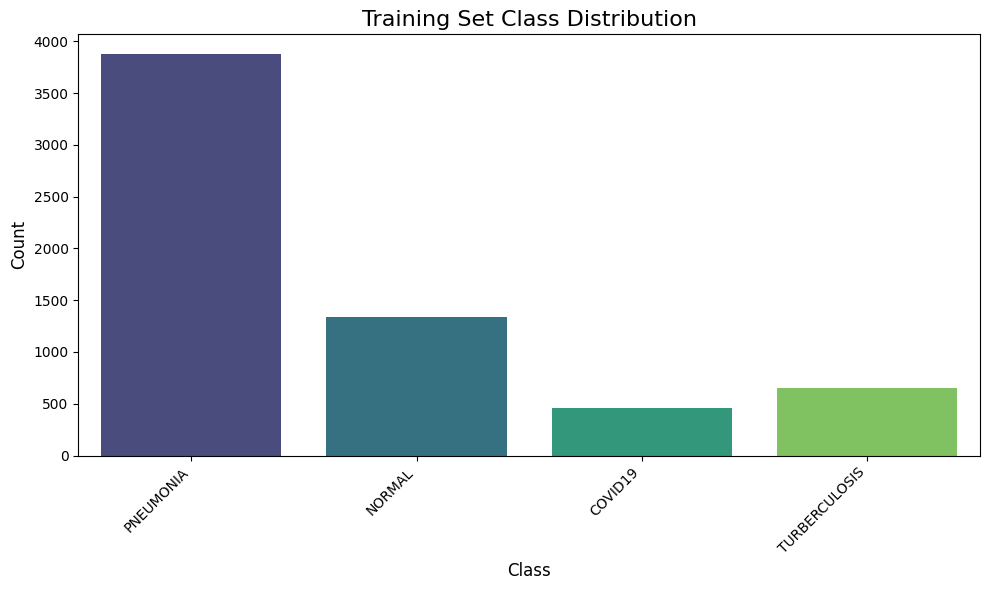

In [ ]:
#  EDA for  Train_df
# 1. Class Distribution in train_df
plot_class_distribution(train_df, "Training Set Class Distribution")



 **Insight:**

 Check for class imbalance.

  A significant difference in the number of samples per class might indicate the need for techniques like oversampling or undersampling ,class weight to balance the dataset for better model training.


# 2. Image Dimensions Analysis in train_df

             width       height
count  6326.000000  6326.000000
mean   1246.190642   946.044104
std     462.397764   429.405009
min     224.000000   127.000000
25%     976.000000   624.000000
50%    1224.000000   848.000000
75%    1528.000000  1170.250000
max    5623.000000  4757.000000


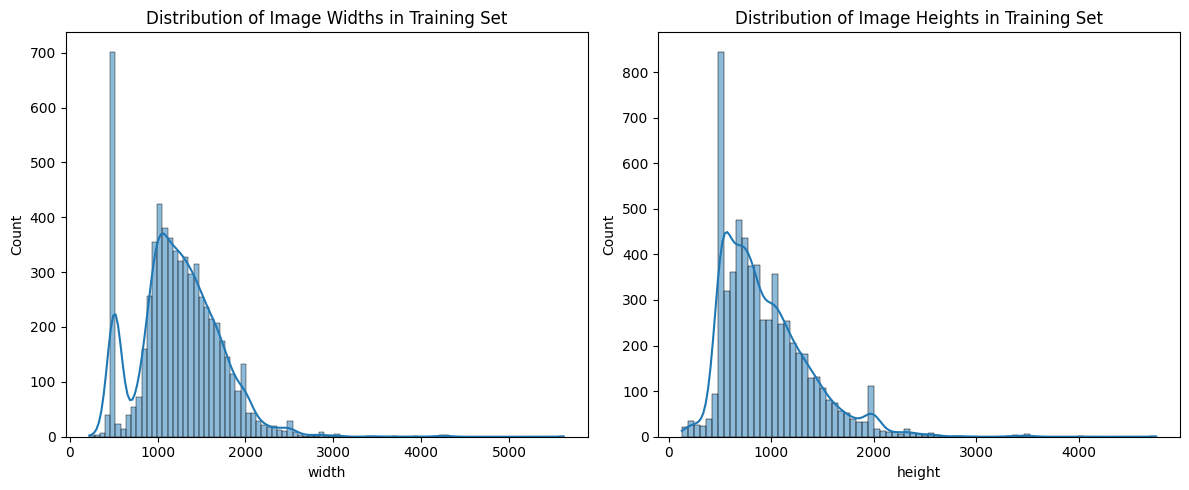

In [ ]:
# 2. Image Dimensions Analysis in train_df
image_dimension_distribution(train_df,'Distribution of Image Heights in Training Set','Distribution of Image Widths in Training Set')



**Insight:**

 Look for  unusual distributions in image dimensions.

  A wide variation in sizes could also affect training efficiency.


 Extremely large or small images require resizing .  




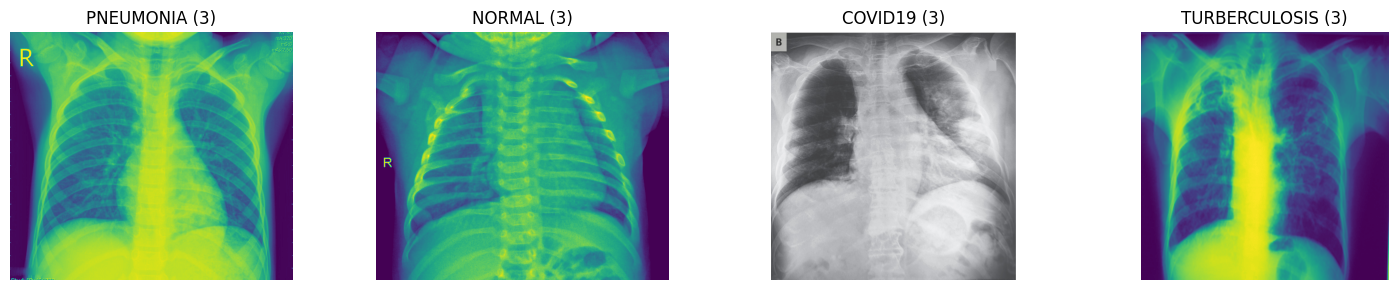

In [ ]:
#  plot images from train_df that include all categort in subplot
# Call the function to plot images
plot_images_by_category(train_df)


# EDA for Test Dataset

label
PNEUMONIA        390
NORMAL           234
COVID19          106
TURBERCULOSIS     41
Name: count, dtype: int64


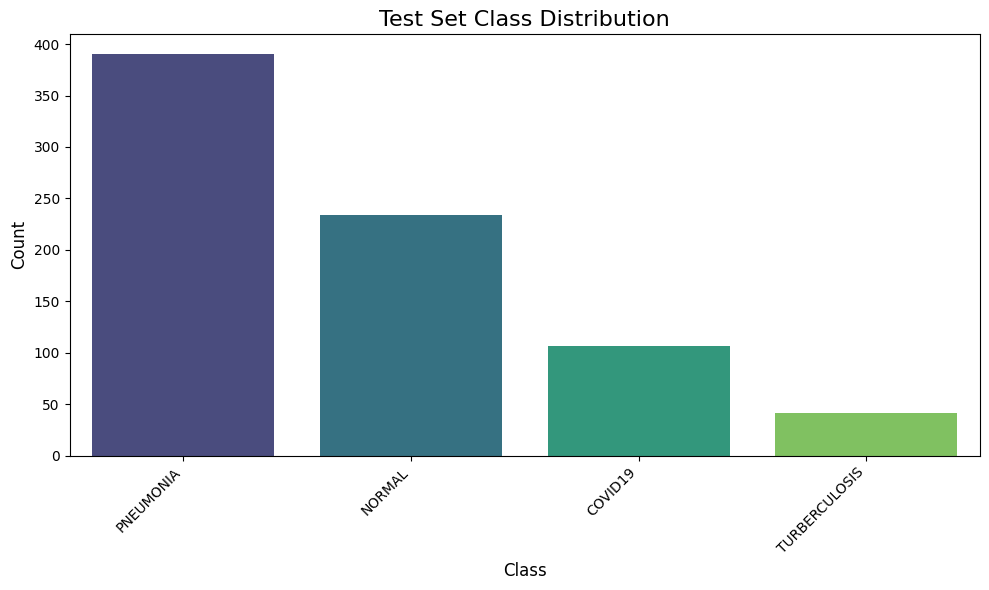

             width       height
count  6326.000000  6326.000000
mean   1246.190642   946.044104
std     462.397764   429.405009
min     224.000000   127.000000
25%     976.000000   624.000000
50%    1224.000000   848.000000
75%    1528.000000  1170.250000
max    5623.000000  4757.000000


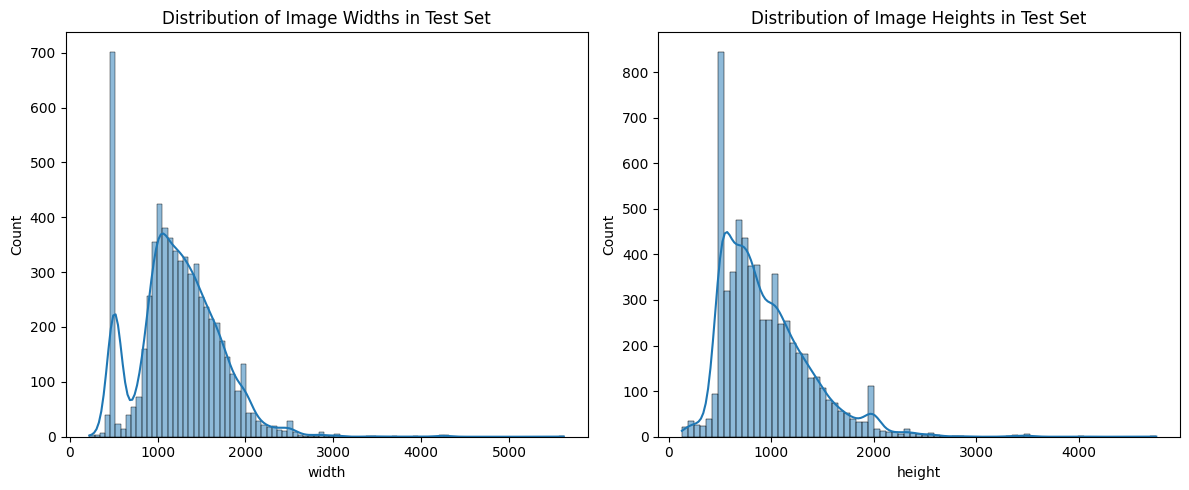

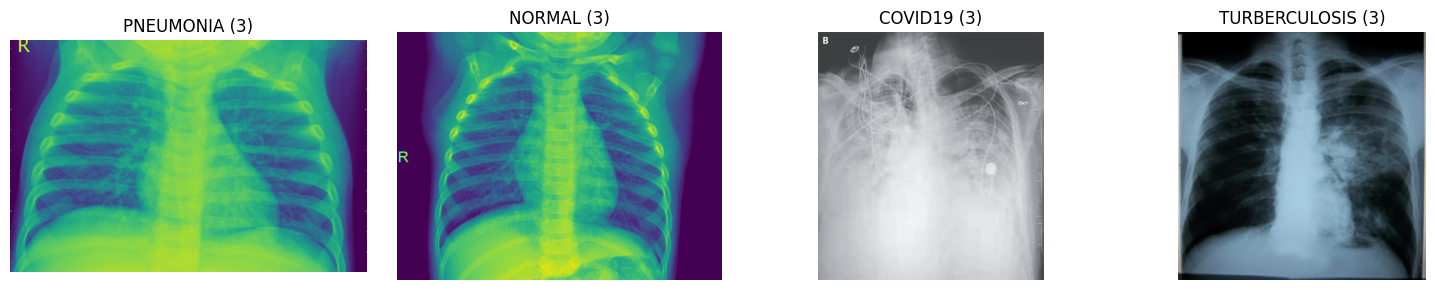

In [ ]:
# call functions for EDA
plot_class_distribution(test_df, "Test Set Class Distribution")
image_dimension_distribution(test_df,
                             'Distribution of Image Heights in Test Set',
                             'Distribution of Image Widths in Test Set')
plot_images_by_category(test_df)

In [14]:

# Concatenate train, test DataFrames

combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Now combined_df contains all the data from train and test.
print(combined_df.head())
combined_df.shape


                                       image_path   label  width  height
0  /content/test/NORMAL/NORMAL2-IM-0028-0001.jpeg  NORMAL   2381    1965
1          /content/test/NORMAL/IM-0084-0001.jpeg  NORMAL   1754    1187
2     /content/test/NORMAL/IM-0033-0001-0002.jpeg  NORMAL   2024    1836
3  /content/test/NORMAL/NORMAL2-IM-0292-0001.jpeg  NORMAL   2380    2074
4          /content/test/NORMAL/IM-0085-0001.jpeg  NORMAL   1558    1014


(1542, 4)

In [15]:
# Save the combined_df DataFrame to a CSV file
combined_df.to_csv('chest_combined_data.csv', index=False)
